<a href="https://colab.research.google.com/github/aseelalzaben03/Graduation-Project-SADEQ-AI/blob/main/TEXT_DATASET_preperaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
!pip install ydata-profiling
!pip install datasets --upgrade


#About First Dataset


The dataset used in this project was scrapped from popular arabic news websites like:

-Misbar (https://misbar.com/)

-No Rumors (http://norumors.net/)

-Verify-Sy (https://verify-sy.com/)

-Fatabyyano (https://fatabyyano.net/)

It's a collection of Arabic news articles labeled as fake or real.

It contains two key columns:
'Article_content'
'Label'
. The 'Label' column represents 2 different validity classes:real and fake.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from ydata_profiling import ProfileReport



## Loading dataset

In [264]:
data=pd.read_csv('/content/fake_news_textdata.csv')
data.head()

,Label,Topic,Article_content
0,real,politics,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,real,politics,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,real,politics,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,real,politics,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,real,politics,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


# Dataset Exploration

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46097 entries, 0 to 46096
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            46097 non-null  object
 1   Topic            46097 non-null  object
 2   Article_content  46097 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [266]:
data.isnull().sum()



,0
Label,0
Topic,0
Article_content,0


In [267]:
data.shape

(46097, 3)

In [268]:
data.columns

Index(['Label', 'Topic', 'Article_content'], dtype='object')

In [269]:
data.describe()


,Label,Topic,Article_content
count,46097,46097,46097
unique,2,38,8874
top,fake,رياضة,[]
freq,42243,16984,150


In [270]:
# Generate the profile report
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:21<00:00,  7.28s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [271]:
data[ 'Topic'].value_counts()

,count
Topic,
رياضة,16984
سياسة,7410
ثقافة وفن,5841
صحة,3458
أخبار,3156
Politics,1826
Sport,1213
Tech,1137
Science and Technology,800


In [272]:
# Mapping to unify topic names
topic_mapping = {
    # Sports
    'رياضة': 'Sports', 'Sport': 'Sports', 'sport': 'Sports', 'Sports': 'Sports',

    # Politics
    'سياسة': 'Politics', 'Politics': 'Politics', 'politics': 'Politics',

    # Culture & Entertainment
    'ثقافة وفن': 'Culture & Entertainment', 'culture': 'Culture & Entertainment',
    'Culture': 'Culture & Entertainment', 'arts': 'Culture & Entertainment',
    'موسيقى': 'Culture & Entertainment', 'entertainment': 'Culture & Entertainment',
    'ترفيه': 'Culture & Entertainment',

    # Health
    'صحة': 'Health', 'health': 'Health', 'Medical': 'Health',

    # News
    'أخبار': 'News', 'news': 'News', 'Social': 'News', 'middle-east': 'News',
    'opinion': 'News', 'midan': 'News', 'family': 'News', 'lifestyle': 'News',
    'turath': 'News',

    # Science & Technology
    'Tech': 'Science & Technology', 'tech': 'Science & Technology',
    'Technology': 'Science & Technology', 'تكنولوجيا': 'Science & Technology',
    'Science and Technology': 'Science & Technology', 'Science': 'Science & Technology',
    'science': 'Science & Technology',

    # Economy & Business
    'Economic': 'Economy & Business', 'Economy': 'Economy & Business',
    'Finance': 'Economy & Business', 'business': 'Economy & Business',

    # Religion
    'Religion': 'Religion'
}

# Apply the mapping on the original DataFrame column
data['Topic'] = data['Topic'].replace(topic_mapping)


In [273]:
data['Topic'].value_counts()

,count
Topic,
Sports,18683
Politics,9304
Culture & Entertainment,6587
News,4180
Health,3568
Science & Technology,2584
Economy & Business,1155
Religion,36


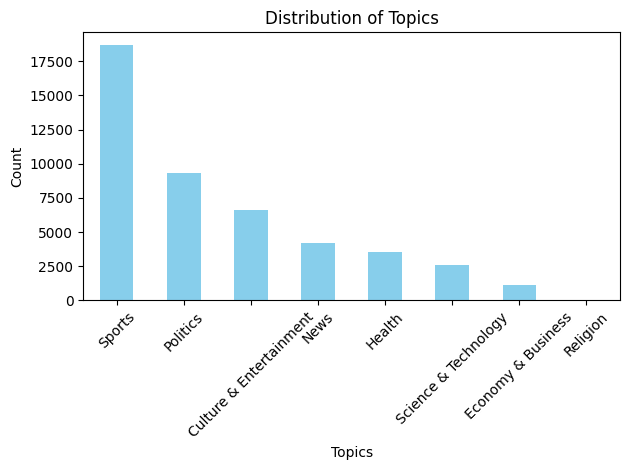

In [274]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each topic after applying the mapping
topic_counts = data['Topic'].value_counts()

# Plot a bar chart to visualize the distribution of topics
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [275]:
data['Label'].value_counts()

,count
Label,
fake,42243
real,3854


Clearly impalance data !!



In [276]:
# Rename the 'Label' column to 'is_fake'
data = data.rename(columns={'Article_content': 'news'})


In [277]:
# Rename the 'Label' column to 'is_fake'
data = data.rename(columns={'Label': 'is_fake'})

#  Replace values - 'real' becomes 0, 'fake' becomes 1
data['is_fake'] = data['is_fake'].replace({'real': 0, 'fake': 1})

data['is_fake']

,is_fake
0,0
1,0
2,0
3,0
4,0
...,...
46092,1
46093,1
46094,1
46095,1


In [278]:
data.shape

(46097, 3)

In [279]:
data['news'].duplicated().sum()

np.int64(37223)

In [280]:
data.drop_duplicates(inplace=True)

In [281]:
data.shape

(8885, 3)

In [282]:
data['is_fake'].value_counts()

,count
is_fake,
1,6067
0,2818


## Seconed Dataset from Hugging face

In [283]:
data4=pd.read_csv('https://huggingface.co/datasets/sanaa-11/fake-real-arabic-news/raw/main/real-moroccan-news.csv')
data4.head()

,label,Content
0,real,أفادت المندوبية السامية للتخطيط بأن 69 في الما...
1,real,أعلنت الخدمة الوطنية للصحة وجودة الأغذية الفلا...
2,real,سجالاتٌ واضحة انطلقت بين باحثين في الشأن الاقت...
3,real,أفادت المندوبية السامية للتخطيط بأن 48 في الما...
4,real,تستمر “تجارة القرب” في هيمنتها على “النسيج الت...


In [284]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1136 non-null   object
 1   Content  1136 non-null   object
dtypes: object(2)
memory usage: 17.9+ KB


In [285]:
data4.isnull().sum()

,0
label,0
Content,0


In [286]:
data4.duplicated().sum()

np.int64(37)

In [287]:
# Create a copy to avoid modifying the original data
result2 = data4.copy()

# Rename 'content' column to 'news'
result2= result2.rename(columns={'Content': 'news'})

# Rename 'label' column to 'is_fake'
result2 = result2.rename(columns={'label': 'is_fake'})

# Fill all values in 'is_fake' column with 0
result2['is_fake'] = 0

# Display the first few rows to verify changes
print(result2.head())

   is_fake                                               news
0        0  أفادت المندوبية السامية للتخطيط بأن 69 في الما...
1        0  أعلنت الخدمة الوطنية للصحة وجودة الأغذية الفلا...
2        0  سجالاتٌ واضحة انطلقت بين باحثين في الشأن الاقت...
3        0  أفادت المندوبية السامية للتخطيط بأن 48 في الما...
4        0  تستمر “تجارة القرب” في هيمنتها على “النسيج الت...


In [288]:
# Generate the profile report
profile = ProfileReport(result2, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [289]:
result2['news'].drop_duplicates(inplace=True)

In [290]:
result2.shape

(1136, 2)

## Third dataset from Kaggle

In [291]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aseelalzaben","key":"b18c7bdbf2ef382ff9ad2e819a62a8f7"}'}

In [292]:
import os
import zipfile

os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# تحميل الداتا من Kaggle
!kaggle datasets download -d latif8/arabic-news-dataset-results-from-web-scraping


Dataset URL: https://www.kaggle.com/datasets/latif8/arabic-news-dataset-results-from-web-scraping
License(s): Attribution 4.0 International (CC BY 4.0)
arabic-news-dataset-results-from-web-scraping.zip: Skipping, found more recently modified local copy (use --force to force download)


In [293]:
# فك الضغط
with zipfile.ZipFile("arabic-news-dataset-results-from-web-scraping.zip", 'r') as zip_ref:
    zip_ref.extractall("arabic_news_data")

# استعراض الملفات
import os
os.listdir("arabic_news_data")


['ARABIC-NEWS-CLASSIFICATION-MERGED.csv']

In [294]:
import pandas as pd

result3 = pd.read_csv("/content/arabic_news_data/ARABIC-NEWS-CLASSIFICATION-MERGED.csv")
result3.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,Aljazeera,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,Aljazeera,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,Aljazeera,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,Aljazeera,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,Aljazeera,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [295]:
result3=result3[['Article_content','Label']]

In [296]:
result3.head()

,Article_content,Label
0,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,real
1,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,real
2,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,real
3,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,real
4,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,real


In [297]:
result3['Label'].value_counts()

,count
Label,
fake,5257
real,3662


In [298]:
# Generate the profile report
profile = ProfileReport(result3, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:12<00:00,  6.05s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [299]:
result3.duplicated().sum()

np.int64(1113)

In [300]:
result3['Article_content'].isnull().sum()

np.int64(606)

In [301]:

result3.dropna(inplace=True)

In [302]:
# إعادة تسمية الأعمدة
result3 = result3.rename(columns={
    'Article_content': 'news',
    'Label': 'is_fake'
})

# تحويل القيم: real → 0 ، fake → 1
result3['is_fake'] = result3['is_fake'].map({'real': 0, 'fake': 1})


In [303]:
result3.columns

Index(['news', 'is_fake'], dtype='object')

In [304]:
result3['news'].drop_duplicates(inplace=True)

In [305]:
result3.shape

(8313, 2)

## Fourth Dataset from hugging face

In [306]:

from datasets import load_dataset

# تحميل مجموعة البيانات كاملة (فيها فقط train)
dataset = load_dataset("HeshamHaroon/Arabic_fake_news_dataset", split="train")


In [307]:
import pandas as pd

result4 = pd.DataFrame(dataset)
result4.head()


,fakes,link,trues
0,[الإدعاء\n فيديو منتشر حاليا وكتير من متابعينا...,https://matsda2sh.com/details/9138/%D8%AD%D9%8...,[– حسب شهادات ناس من سلطنة عُمان من ظهر في الف...
1,"[الإدعاء\n""صحيفة سيتي برس النهارده.. كاتبة إن ...",https://matsda2sh.com/details/12852/%D8%AD%D9%...,[📌 التصحيح: ⬇️⬇️ ◾ كلام علاء صادق غير صحيح. ✅✅...
2,[الإدعاء\n- سكرين شوت منتشر بشكل كبير جدًا لتغ...,https://matsda2sh.com/details/12179/%D8%AD%D9%...,[- الكلام ده غير صحيح. دي تغريدة مفبركة، والصو...
3,[الإدعاء\n“يعني عندنا كام بطاقة تموين، عندنا 7...,https://matsda2sh.com/details/12071/%D8%AD%D9%...,[– يبلغ عدد البطاقات التموينية فى مصر نحو 23 م...
4,"[الإدعاء\n""حبساتي كلها سياسة، مرة علشان زكريا ...",https://matsda2sh.com/details/11173/%D8%AD%D9%...,[– ليس صحيحًا أن كل المرات التي حُبس مرتضى منص...


In [308]:
# Create a DataFrame for fake news
fakes_df = pd.DataFrame({
    'news': result4['fakes'],
    'is_fake': 1
})

# Create a DataFrame for real news
trues_df = pd.DataFrame({
    'news': result4['trues'],
    'is_fake': 0
})

# Concatenate both DataFrames into a single one
combined_df = pd.concat([fakes_df, trues_df], ignore_index=True)

# Drop any rows with missing news text (just in case)
combined_df.dropna(subset=['news'], inplace=True)

# Display the first 5 rows
combined_df.head()

,news,is_fake
0,[الإدعاء\n فيديو منتشر حاليا وكتير من متابعينا...,1
1,"[الإدعاء\n""صحيفة سيتي برس النهارده.. كاتبة إن ...",1
2,[الإدعاء\n- سكرين شوت منتشر بشكل كبير جدًا لتغ...,1
3,[الإدعاء\n“يعني عندنا كام بطاقة تموين، عندنا 7...,1
4,"[الإدعاء\n""حبساتي كلها سياسة، مرة علشان زكريا ...",1


In [309]:

combined_df.columns

Index(['news', 'is_fake'], dtype='object')

In [310]:
combined_df['is_fake'].value_counts()

,count
is_fake,
1,3133
0,3133


In [311]:
# Generate the profile report
profile = ProfileReport(combined_df, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 117.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [312]:
combined_df['news'].duplicated().sum()

np.int64(488)

In [313]:
combined_df['news'].drop_duplicates(inplace=True)

In [314]:
combined_df.shape

(6266, 2)

In [315]:
combined_df['is_fake'].value_counts()

,count
is_fake,
1,3133
0,3133


## All in one dataset

In [316]:
# Concatenate data2 and data
new_data = pd.concat([data,result2,result3,combined_df], ignore_index=True)


In [317]:
new_data.head()

,is_fake,Topic,news
0,0,Politics,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,0,Politics,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,0,Politics,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,0,Politics,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,0,Politics,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [318]:
new_data.drop('Topic', axis=1, inplace=True)


In [319]:
new_data.shape

(24600, 2)

In [320]:
new_data.columns

Index(['is_fake', 'news'], dtype='object')

In [321]:
new_data['is_fake'].value_counts()

,count
is_fake,
1,14457
0,10143


In [322]:

new_data['news'].duplicated().sum()

np.int64(8849)

In [323]:
new_data.drop_duplicates(subset='news', inplace=True)


In [324]:
new_data.shape

(15751, 2)

In [325]:

new_data['is_fake'].value_counts()

,count
is_fake,
1,8908
0,6843


In [326]:
new_data.shape

(15751, 2)

In [327]:
from sklearn.utils import resample

# Separate majority and minority classes
df_minority= new_data[new_data['is_fake'] == 0]
df_majority = new_data[new_data['is_fake'] == 1]

# Calculate number of samples to downsample to
n_samples = len(df_minority)

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,          # without replacement
    n_samples=n_samples,
    random_state=42
)

# Combine and shuffle
balanced_data = pd.concat([df_majority_downsampled, df_minority])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balance
print(balanced_data['is_fake'].value_counts())


is_fake
1    6843
0    6843
Name: count, dtype: int64


In [328]:
balanced_data.shape

(13686, 2)

In [329]:
balanced_data


,is_fake,news
0,1,['الإدعاء\nقال رئيس تحرير جريدة الأخبار السابق...
1,0,مُنحت شركة تعدين كندية امتيازا لأكثر من نصف جز...
2,1,['الإدعاء\n- محمد فضل، عضو اللجنة الخماسية الم...
3,0,[– الكلام ده غير صحيح، الصفحة مفبركة. نادي بير...
4,0,"رغم ""كارثية"" ما وقع في لبنان حيث ""تفجير المرفأ..."
...,...,...
13681,1,[الإدعاء\n- صورة منتشرة لعامل نظافة واقع على ا...
13682,0,[– الكلام ده غير دقيق. مصاريف المدارس الحكومية...
13683,1,[الإدعاء\nصورة منتشرة بشكل كبير جدًا لعلمي مصر...
13684,1,[الإدعاء\n- ناس كتير بعتت لنا عايزه تتأكد من ب...


In [330]:
balanced_data.to_excel('correct_balanced_data_Ffinnall.xlsx', index=False)


In [331]:
from google.colab import files
files.download('correct_balanced_data_Ffinnall.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [332]:
balanced_data.columns

Index(['is_fake', 'news'], dtype='object')

In [333]:
balanced_data.shape

(13686, 2)

In [334]:

balanced_data['news'].duplicated().sum()

np.int64(0)

In [335]:
balanced_data['is_fake'].value_counts()

,count
is_fake,
1,6843
0,6843
